# Image Compression using K-Means Clustering

### Objective
In this project, we will apply **K-Means clustering** to an image to reduce its number of unique colors while preserving visual quality.

### Why Use K-Means for Image Compression?
- Reduces image file size while keeping the visual details intact.
- Useful for applications where a lower number of colors is required (e.g., icons, logos).
- Helps in **image segmentation** and **computer vision tasks**.
  
### About the Author
This notebook was created by **Aimal Khan**.
- **Purpose:** To demonstrate K-Means clustering for image compression.
- **Topics Covered:** Data preprocessing, feature scaling, the Elbow Method, K-Means clustering, and evaluation using the Silhouette Score.

Feel free to use and modify this notebook for learning purposes!

We install and import necessary Python libraries for image processing, clustering, and visualization.

In [29]:
# !pip install numpy pandas matplotlib opencv-python seaborn scikit-learn

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

We load an image using **OpenCV** and convert it from BGR (OpenCV default) to RGB format for correct color representation.

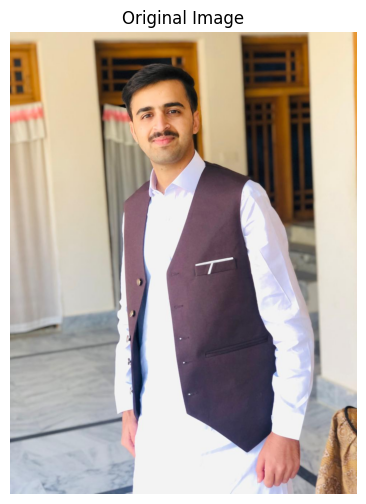

In [31]:
# Load image
image = cv2.imread('./image.jpg')  # Replace 'image.jpg' with your image path

# Convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display original image
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')
plt.show()

K-Means operates on a **2D dataset**, so we reshape the image from **(height, width, channels) → (pixels, 3)**, where each pixel is represented by its RGB values.

In [32]:
# Get image dimensions
h, w, c = image.shape
# Reshape image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Convert to float for better precision
pixels = np.float32(pixels)

To determine the best **K** for clustering, we calculate the **Within-Cluster Sum of Squares (WCSS)** for different values of **K** and plot the results.

**Elbow Method Steps:**
1. Try different values of **K** (e.g., 1 to 15).
2. Compute the **WCSS** for each K.
3. Plot WCSS vs. K and look for the "elbow point" where the WCSS decrease slows down.

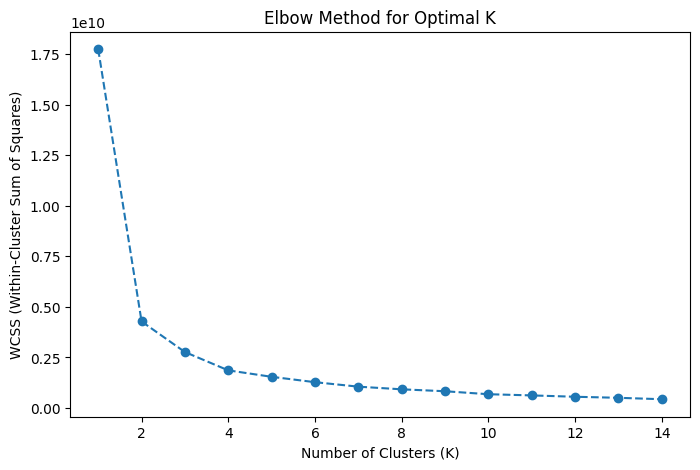

In [33]:
# Try different values of K to find the optimal number of clusters
wcss = []
K_values = range(1, 15)  # Testing K from 1 to 15

for k in K_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(pixels)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

We apply **K-Means clustering** to find the **K most dominant colors** in the image. We use the **K-Means++** initialization to improve centroid selection.

**K-Means Objective Function:**
$J = \sum_{i=1}^{m} \sum_{k=1}^{K} \mathbb{1}(c^{(i)} = k) ||x^{(i)} - \mu_k||^2$

where:
- $\mu_k$ is the centroid of cluster $k$.
- $x^{(i)}$ is a pixel assigned to cluster $k$.

In [34]:
# Define number of clusters (K) - You can change this value
K = 10

# Apply K-Means
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42)
labels = kmeans.fit_predict(pixels)

# Get the cluster centroids (RGB values of dominant colors)
centroids = np.uint8(kmeans.cluster_centers_)
kmeans, labels, centroids

(KMeans(n_clusters=10, random_state=42),
 array([5, 5, 5, ..., 6, 6, 6]),
 array([[238, 236, 234],
        [ 66,  55,  72],
        [160, 159, 156],
        [185, 120,  66],
        [ 40,  30,  25],
        [230, 210, 180],
        [213, 179, 145],
        [122, 100, 108],
        [121,  70,  19],
        [190, 192, 198]], dtype=uint8))

Each pixel is now assigned the RGB value of its cluster centroid, reducing the number of unique colors in the image.

In [35]:
# Replace each pixel with its cluster's centroid color
compressed_image = centroids[labels]

# Reshape back to original image dimensions
compressed_image = compressed_image.reshape(h, w, c)

We compare the original image with the compressed version using **K = 8 colors**.

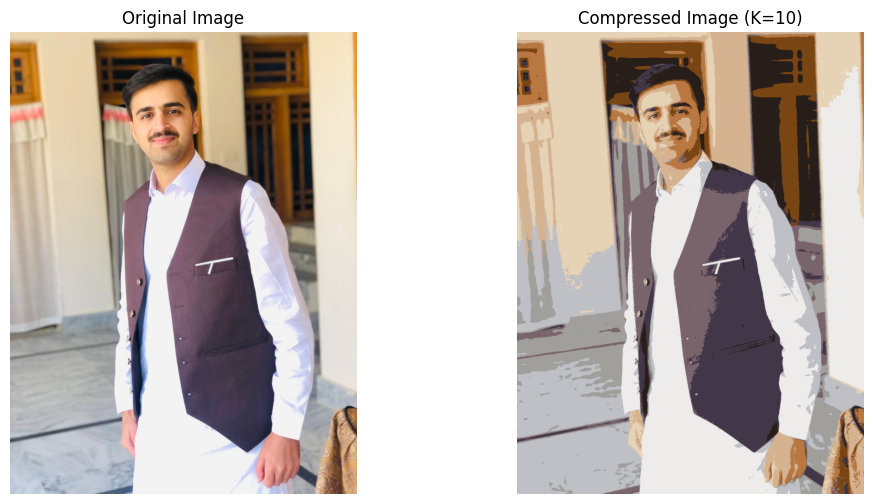

In [36]:
# Plot original and compressed images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original Image
ax[0].imshow(image)
ax[0].axis('off')
ax[0].set_title('Original Image')

# Compressed Image
ax[1].imshow(compressed_image)
ax[1].axis('off')
ax[1].set_title(f'Compressed Image (K={K})')

plt.show()

- **The compressed image retains most visual details** but uses fewer colors.
- **Larger K values** retain more details, while **smaller K values** result in stronger compression.
- This method is useful for **image processing, data visualization, and computational efficiency**.